# Part I - Ford GoBike System Data
## by RATOVONIAINA Tsilavo Fitiavana

## Introduction
> This analysis explores dataset containing informations about solo rides made in a bike-sharing system covering the greater San Francisco Bay area.   


## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# Let's have a quick viw on columns data types and shape
print(df.shape)
print(df.info())

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  floa

In [4]:
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
# Let's change the types of the date time columns and extract the day, hour and month for further analysis
def change_datatype_format(df,col):
    df[col]=pd.to_datetime(df[col])
    df[f"{col}_hour"]=df[col].dt.hour
    df[f"{col}_day"]=df[col].dt.day_name()
    #df[f"{col}_month"]=df[col].dt.month_name()
    
for col in ["start_time","end_time"] :
    change_datatype_format(df,col)

In [6]:
# For better use of the member birth year, it is needed to create a column age of member
df['member_age']=2019 - df['member_birth_year'] # the survey was done in 2019

In [7]:
# We can't do anything with the missing values on start columns and member information, and they may affect the analysis so let's drop them
df.dropna(inplace=True)

In [8]:
# Let's test our data wrangling
print(df.shape)
print(df.info())

(174952, 21)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  use

In [9]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,start_time_hour,end_time_hour,member_age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135,13.456165,13.609533,34.196865
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731,4.734282,4.748029,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,0.000000,0.000000,18.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,9.000000,9.000000,27.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000,14.000000,14.000000,32.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000,17.000000,18.000000,39.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,23.000000,23.000000,141.000000


### What is the structure of your dataset?

> There are 183412 rides in the dataset with 16 initial features: there are numerical and categorical features. After data wrangling, we will deal with 174952 rides and 5 additional features: exctracting the hour, day and month of datetime column and the age of the member

### What is/are the main feature(s) of interest in your dataset?

> I am most interested in the *start_time* as it shows the number of rides, the *duration_sec* and the *user_type* as they can have strong connections.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think that the  member gender and age plus the period of the ride have the strongest impact on the trips.

## Univariate Exploration

In [10]:
color = [171/255, 46/255, 53/255]

# Function that plot the distribution 
def plot_distribution(data=df,x=df.duration_sec,order=None,color=color,xlabel="",xsize=11,ysize=10):
    plt.figure(figsize=(xsize,ysize))
    sns.countplot(data=df,x=x,order=order, color=color);
    plt.title(f"Distribution of rides by {xlabel}");
    plt.xlabel(f"{xlabel}");
    plt.ylabel("rides");
    plt.show();
    
# Function that plot the histogram of distribution
def plot_hist(x,color=color,xlabel="",bins=None,limit=False,xlim=0):
    plt.figure(figsize=(8,6))
    sns.distplot(df[x],color=color,bins=bins)
    plt.title(f"Histogram distribution of {xlabel}");
    plt.xlabel(f"{xlabel}");
    plt.ylabel("rides");
    if limit:
        plt.xlim(0,xlim);
    plt.show();

### How are rides distributed during days of week?

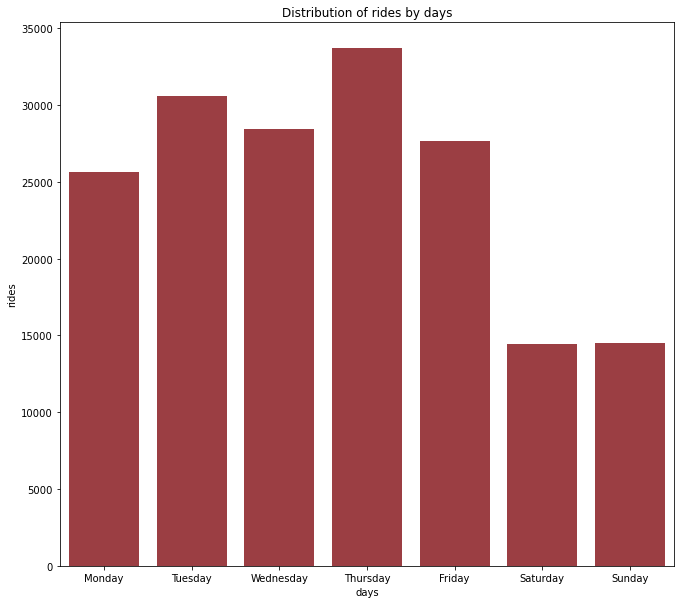

In [11]:
# Order of days in a week
days=['Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday' , 'Saturday' , 'Sunday']

# plot the distribution of rides per days 
plot_distribution(x="start_time_day",order=days,color=color, xlabel="days")

We can see that the the rides are frequent on thursday, then tuesday and wednesday

### How are rides distributed per hours?

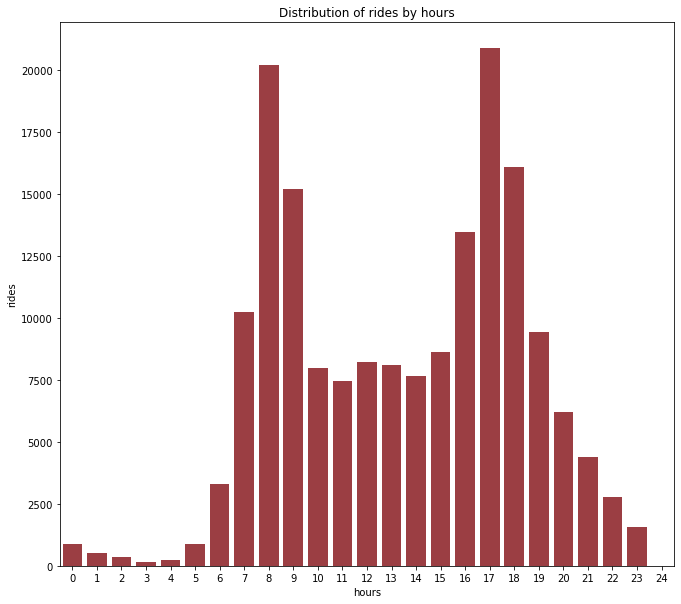

In [12]:
# Order of hours in a day
hours=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

# plot the distribution of rides per hour
plot_distribution(x="start_time_hour",order=hours,color=color,xlabel="hours")

We can see that the distribution of rides per hours is bimodal: rides are more frequent at 8 am and 5 pm

### How are rides distributed per user type?

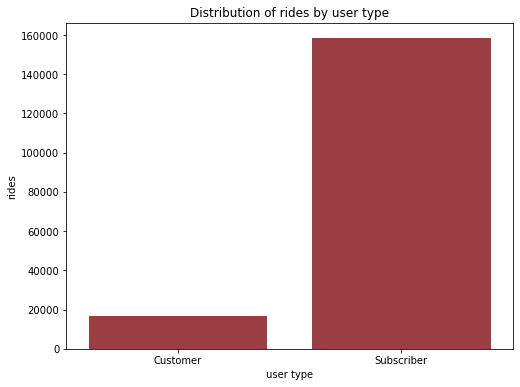

In [13]:
# plot the distribution of rides per user type
plot_distribution(x="user_type",order=None,color=color,xlabel="user type",xsize=8,ysize=6)

People who subscribe to the bike-sharing system are significantly having more rides than the simple customer

### How are rides distributed per member age?

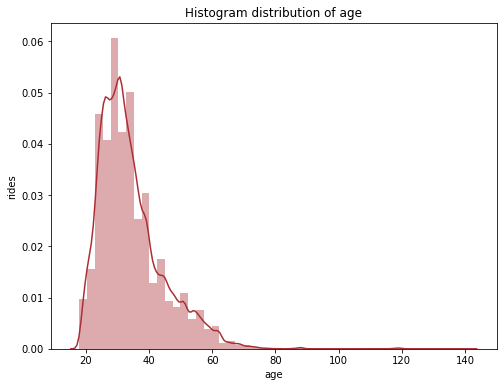

In [14]:
# plot the distribution of the rides per age
plot_hist("member_age",xlabel="age")

We can see that the age of the riders are frequent between 20 and 40. But there are outliers that we need to deal with (>75)

In [15]:
# we will use only people under 90
df = df[df.member_age<=75]

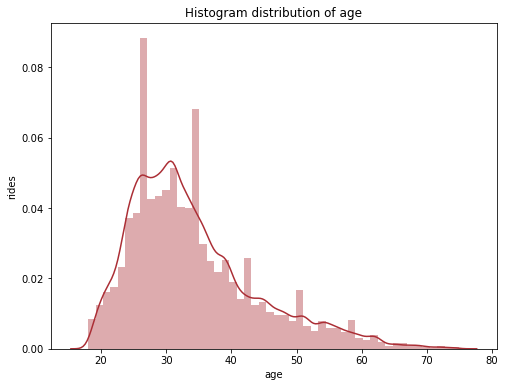

In [16]:
# plot the distribution of the rides per age
plot_hist("member_age",xlabel="age")

Finally we can see that the most frequent age of the riders is between 25 and 40 

### How are rides distributed per member gender?

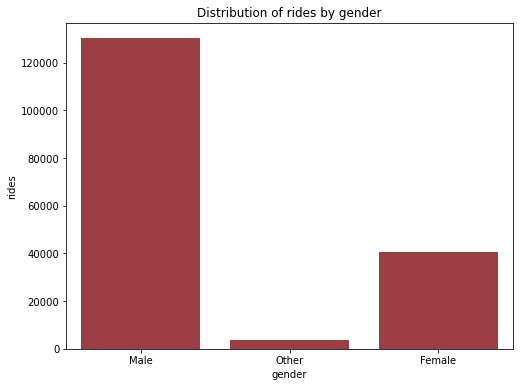

In [17]:
# Plot the distribution of the rides per gender
plot_distribution(x="member_gender",order=None,color=color,xlabel="gender",xsize=8,ysize=6)

The riders are mostly male

### How are ride durations distribute?

We can now deal with the ride duration as we removed the outliers

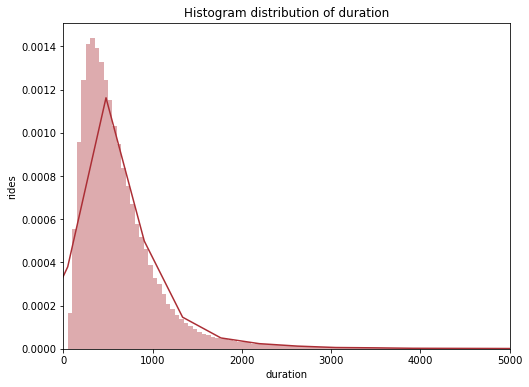

In [18]:
bins_duration = np.arange(0, df['duration_sec'].max()+50,50)

# Plot the histogram distribution of duration
plot_hist(x="duration_sec",xlabel="duration",bins=bins_duration,limit=True,xlim=5000)


We can see that the majority ride duration is under 1000 seconds, let's plot all rides under 1000 seconds

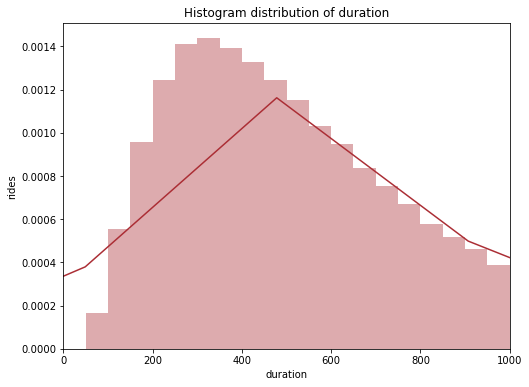

In [19]:
# Plot the histogram distribution of duration
plot_hist(x="duration_sec",xlabel="duration",bins=bins_duration,limit=True,xlim=1000)

We can finally say that the duration of rides are between 200 and 1000 seconds with peak 250 seconds.

### How are rides distributed in the top 10 start stations?

As there are many start stations, let's focus more on **the top 10**

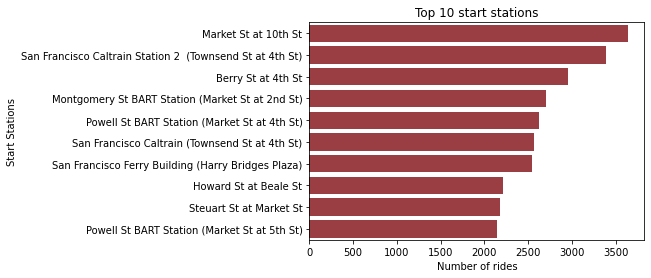

In [20]:
# Take only the top 10
count_station = df["start_station_name"].value_counts()[0:10]
station_name = df[df.start_station_name.isin(list(count_station.index))]

# plot the distribution of start stations
sns.countplot(data=station_name,y="start_station_name", color=color, order=count_station.index);
plt.title('Top 10 start stations')
plt.xlabel('Number of rides')
plt.ylabel('Start Stations');
plt.show();

The most frequent start stations are Market St, San Francisco Caltrain and Berry St

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> * The rides are more frequent at 8 am and 5 pm; in wednesday and tuesday
> * The distribution of the duration rides is left skewed so we put a time limit (1000s) to show that most of the rides are between 200 and 1000 seconds
> * Most of the people who ride are subscribers

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The member age have some outliers (even impossible) so we only use the age under 75 to show that the riders are aged between 25 and 40

## Bivariate Exploration

In [21]:
# Functions barplot
def plot_bar(data=df,x=None,y=None,order=None,color=color,xsize=12,ysize=10,xlabel="",ylabel="",title=""):
    plt.figure(figsize=(xsize,ysize))
    sns.barplot(data=df, x=x, y=y, color=color,order=order)
    plt.xticks(rotation=30)
    plt.title(f"{title}");
    plt.xlabel(f"{xlabel}");
    plt.ylabel(f"{ylabel}");

def plot_bivariate_count(data=df,x=None,order=None,hue=None,xsize=12,ysize=10,xlabel="",ylabel="",title=""):
    plt.figure(figsize=(xsize,ysize))
    sns.countplot(data = df, x = x, hue = hue,order=order)
    plt.title(f"{title}");
    plt.xlabel(f"{xlabel}");
    plt.ylabel(f"{ylabel}");

### Are there any relation between ride duration and start time?

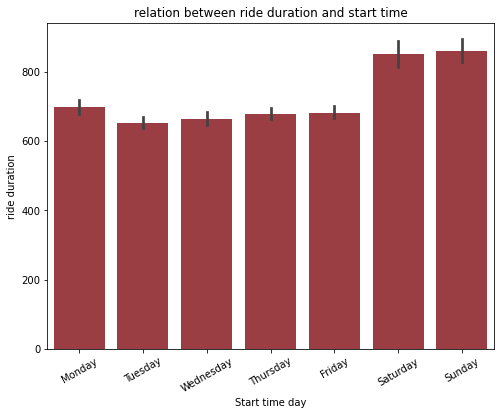

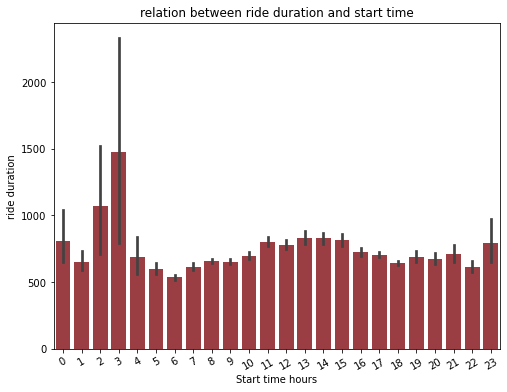

In [22]:
time_columns = ["start_time_day","start_time_hour"]

# plot the relations between ride duration anf start time
for col in time_columns:
    order=None
    name = "Start time hours"
    if col == "start_time_day":
        order = days
        name = "Start time day"
    plot_bar(x=col,y="duration_sec",order=order,xsize=8,ysize=6,
            title="relation between ride duration and start time",xlabel=name,ylabel="ride duration")

We can see that rides are longer on weekend, at night: 11pm to 3 am  

### Are there any connections between ride duration and user type?

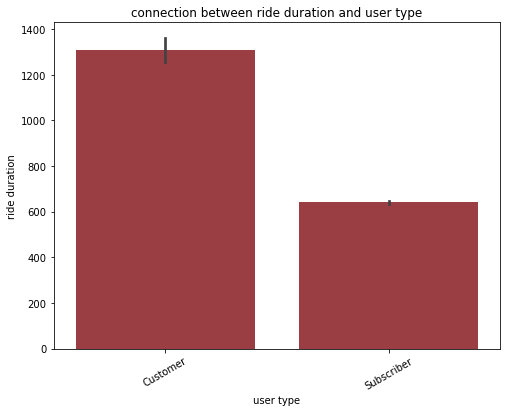

In [23]:
plot_bar(x="user_type",y="duration_sec",xsize=8,ysize=6,title="connection between ride duration and user type",xlabel="user type",ylabel="ride duration")

We can see that the customer ride longer than subscriber

### Are there any relations between ride duration and member gender

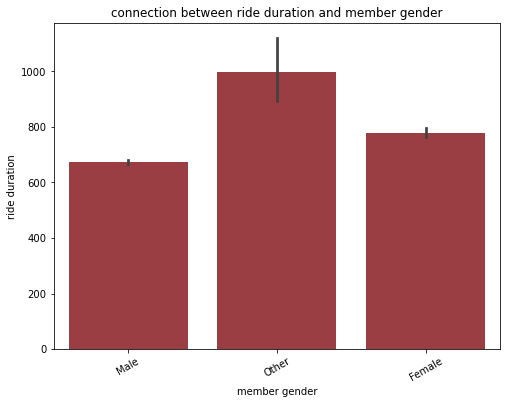

In [24]:
plot_bar(x="member_gender",y="duration_sec",xsize=8,ysize=6,title="connection between ride duration and member gender",xlabel="member gender",ylabel="ride duration")

The Other ride longer than the female and male

### Do ride duration and member age have correlation?

As there are several outliers, let's plot only duration rides under 5000 seconds

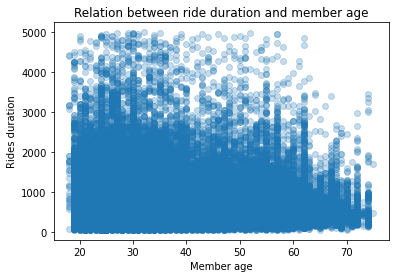

In [25]:
duration = df[df.duration_sec<=5000]

plt.scatter(data = duration, x = 'member_age', y = 'duration_sec',alpha=1/4);
plt.title("Relation between ride duration and member age");
plt.xlabel('Member age');
plt.ylabel('Rides duration');

The duration of the rides tend to have negative correlation with age of the riders but it is not very relevent.

### Are there any relations between ride start time and user type?

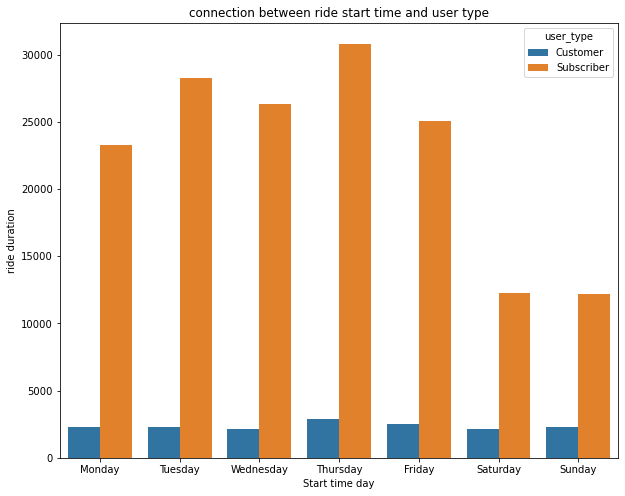

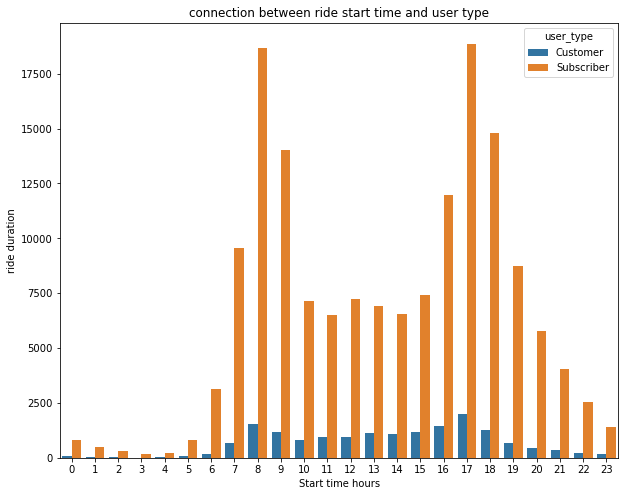

In [26]:
for col in time_columns:
    order=None
    name = "Start time hours"
    if col == "start_time_day":
        order = days
        name = "Start time day"
    plot_bivariate_count(data=df,x=col,order=order,hue="user_type",xsize=10,ysize=8,
                         title="connection between ride start time and user type",xlabel=name,ylabel="ride duration")

We can see that the user type don't have any relation with the start time hour 

### Are there any relations between ride start time and member gender?

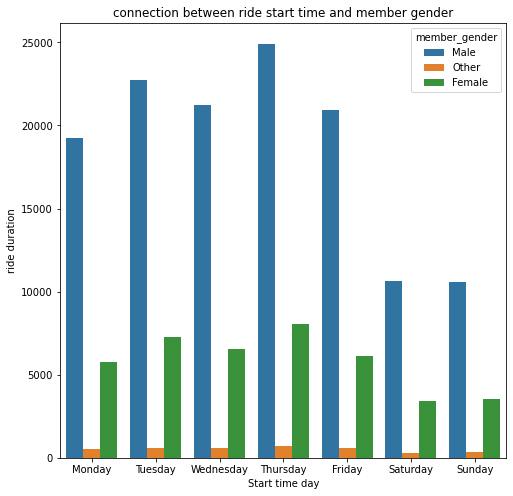

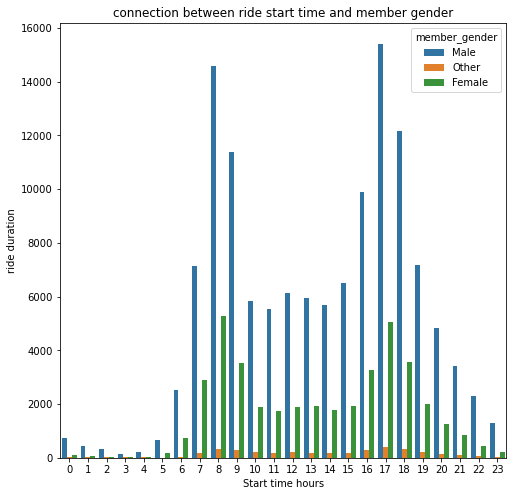

In [27]:
for col in time_columns:
    order=None
    name = "Start time hours"
    if col == "start_time_day":
        order = days
        name = "Start time day"
    plot_bivariate_count(data=df,x=col,order=order,hue="member_gender",xsize=8,ysize=8,
                         title="connection between ride start time and member gender",xlabel=name,ylabel="ride duration")

Like the last conclusion, there is no relations between start time and member gender

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> * Rides are longer on weekend, at night between 11pm an 3am
> * Customers ride longer than subscriber
> * The other member ride longer than male and female member

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It may not be relevent but we can say that the younger the member are, the longer the rides are

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Are there any relations between duration ride, start time, member gender and user type?

#### Let's use start time hour first

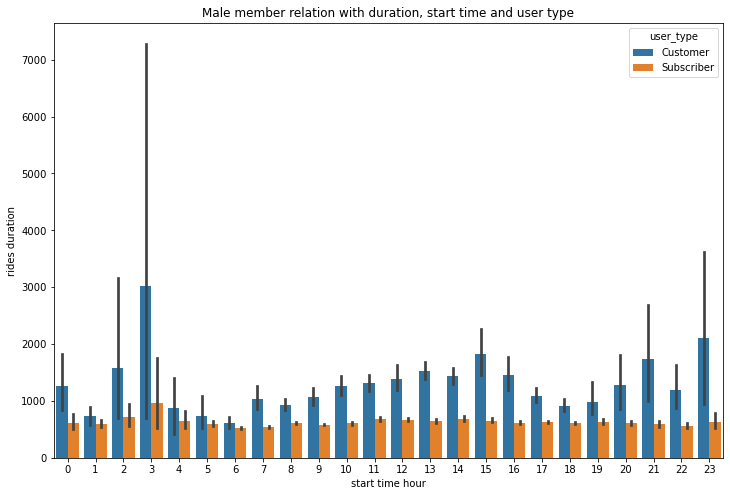

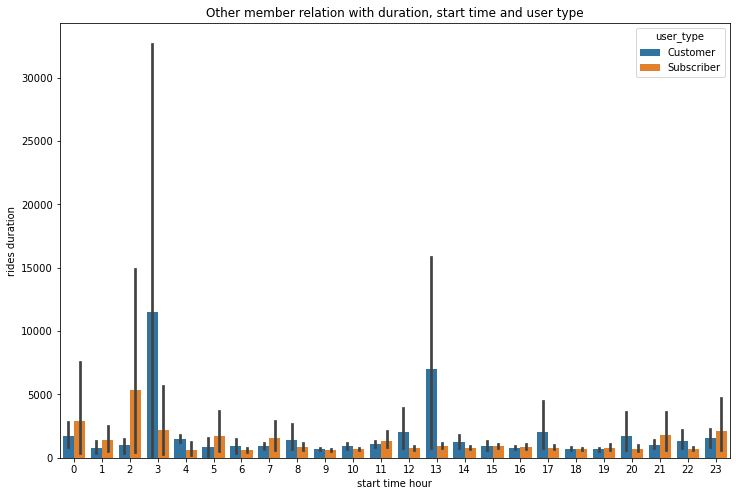

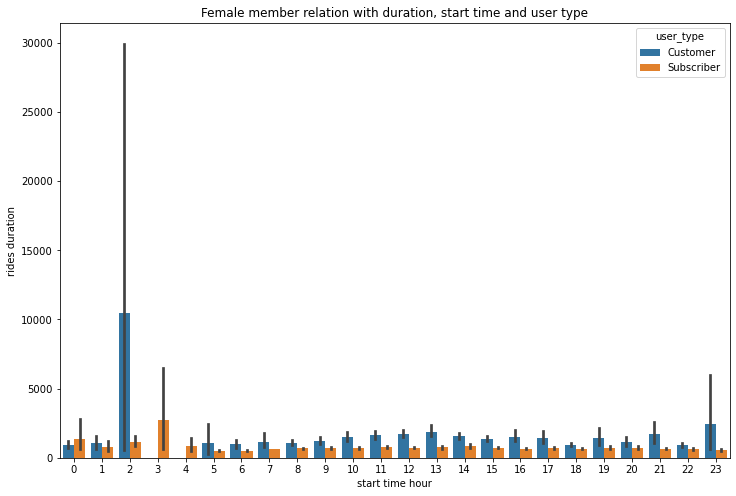

In [28]:
order_type = ["Customer","Subscriber"]

for gender in df.member_gender.unique():
    plt.figure(figsize=(12,8))
    sns.barplot(data = df[df.member_gender==gender], x = 'start_time_hour', y = 'duration_sec', hue = 'user_type',hue_order=order_type)
    plt.title(f"{gender} member relation with duration, start time and user type");
    plt.ylabel("rides duration");
    plt.xlabel("start time hour");
    plt.show();

We can't really say something but only the ride duration of customers are moreless the same per hour

#### Let's use start time day

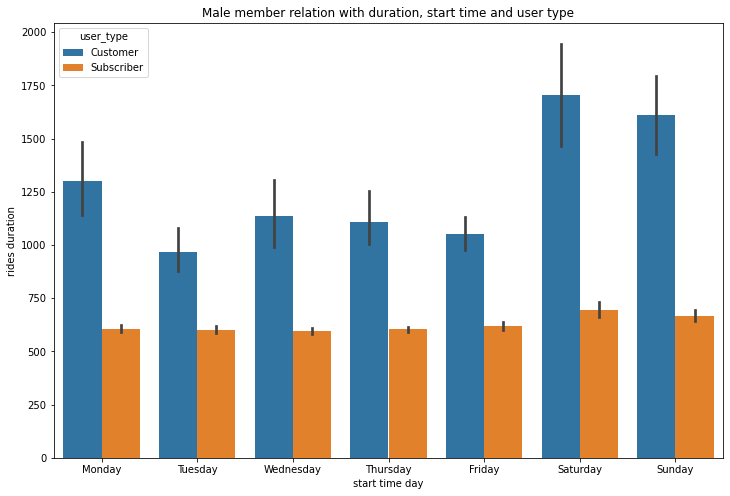

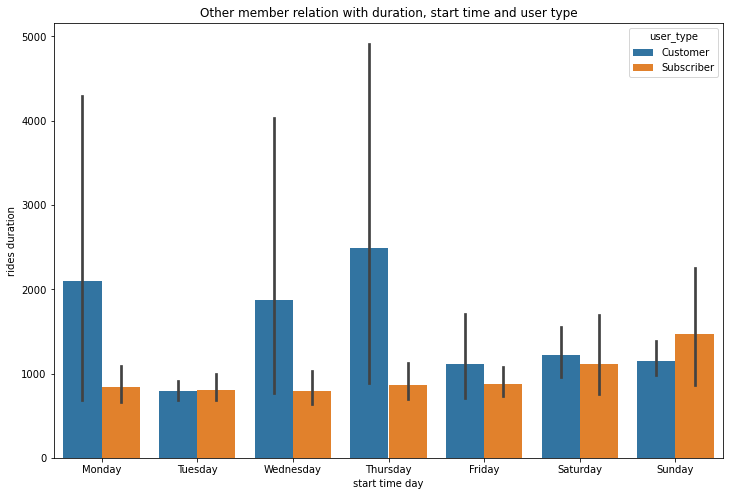

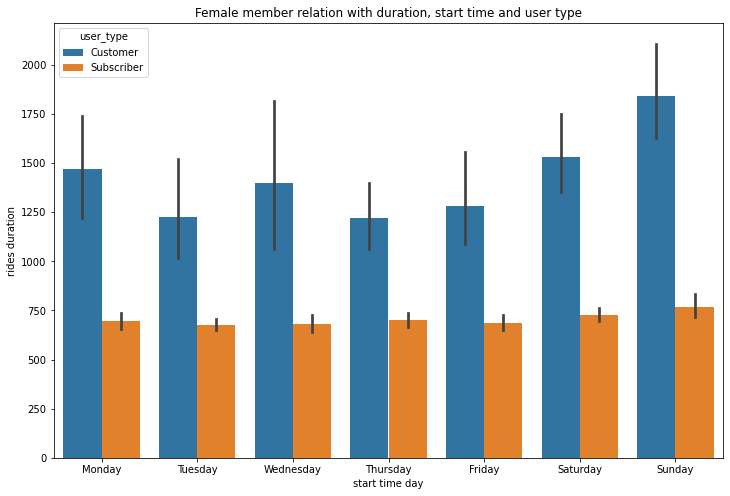

In [29]:
for gender in df.member_gender.unique():
    plt.figure(figsize=(12,8))
    sns.barplot(data = df[df.member_gender==gender], x = 'start_time_day', y = 'duration_sec', hue = 'user_type',hue_order=order_type,order=days)
    plt.title(f"{gender} member relation with duration, start time and user type");
    plt.ylabel("rides duration");
    plt.xlabel("start time day");
    plt.show();

We can say that the customers ride longer on the weekend while the rides of subscribers tend to have the same duration

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> * Male customers ride longer than the others in any time
> * Male subscriber have a stable ride duration in any hour and day

### Were there any interesting or surprising interactions between features?

> There is no relevent surprising interactions between features

## Conclusions
> * Most of the rides are taken on thursday.
> * Customer ride longer than subscriber.
> * Male subscriber have a stable ride duration in any hour and day
